In [1]:
import pandas as pd

# 딕셔너리를 이용한 데이터프레임 생성
data = {'이름' : ['Alice', 'Bob', 'Charlie'],
        '나이' : [25, 30, 35],
        '도시' : ['서울', '뉴욕', '도쿄']}
df = pd.DataFrame(data)

print(df)

        이름  나이  도시
0    Alice  25  서울
1      Bob  30  뉴욕
2  Charlie  35  도쿄


In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
# 데이터프레임의 기본 정보 확인
print(df.info())

# 데이터프레임의 통계적 정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      3 non-null      object
 1   나이      3 non-null      int64 
 2   도시      3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
None
         나이
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0


In [4]:
# 열 선택
names = df['이름']
print(names)
type(names)

0      Alice
1        Bob
2    Charlie
Name: 이름, dtype: object


pandas.core.series.Series

In [5]:
# 행 선택
row = df.loc[0]
print(row)
type(row)

이름    Alice
나이       25
도시       서울
Name: 0, dtype: object


pandas.core.series.Series

In [6]:
filtered_rows = df[df['나이']>30]
print(filtered_rows)
type(filtered_rows)

        이름  나이  도시
2  Charlie  35  도쿄


pandas.core.frame.DataFrame

In [7]:
df['성별'] = ['여', '남', '남']
print(df)

        이름  나이  도시 성별
0    Alice  25  서울  여
1      Bob  30  뉴욕  남
2  Charlie  35  도쿄  남


In [8]:
# CSV 파일로 저장
df.to_csv('data.csv', index=False)

# CSV 파일에서 데이터프레임으로 읽기
new_df = pd.read_csv('data.csv')

print(new_df)

        이름  나이  도시 성별
0    Alice  25  서울  여
1      Bob  30  뉴욕  남
2  Charlie  35  도쿄  남


In [9]:
df = pd.read_excel('score.xlsx', header = None)
df.columns = ['Korean', 'English', 'Math', 'Science']

print(df)

print(df.sum())

print(df.mean())

   Korean  English  Math  Science
0      20       38    44       89
1      45       89    68       45
2      88       75    68       67
Korean     153
English    202
Math       180
Science    201
dtype: int64
Korean     51.000000
English    67.333333
Math       60.000000
Science    67.000000
dtype: float64


In [10]:
df['SUM'] = (df['Korean']+df['English']+df['Math']+df['Science'])
df['MEAN'] = (df['SUM']/4)
df.loc['SUM'] = (df.loc[0]+df.loc[1]+df.loc[2])
df.loc['MEAN'] = round(df.loc['SUM']/3, 2)
df

,Korean,English,Math,Science,SUM,MEAN
0,20.0,38.00,44.0,89.0,191.00,47.75
1,45.0,89.00,68.0,45.0,247.00,61.75
2,88.0,75.00,68.0,67.0,298.00,74.50
SUM,153.0,202.00,180.0,201.0,736.00,184.00
MEAN,51.0,67.33,60.0,67.0,245.33,61.33


In [11]:
df.to_excel('score1.xlsx')

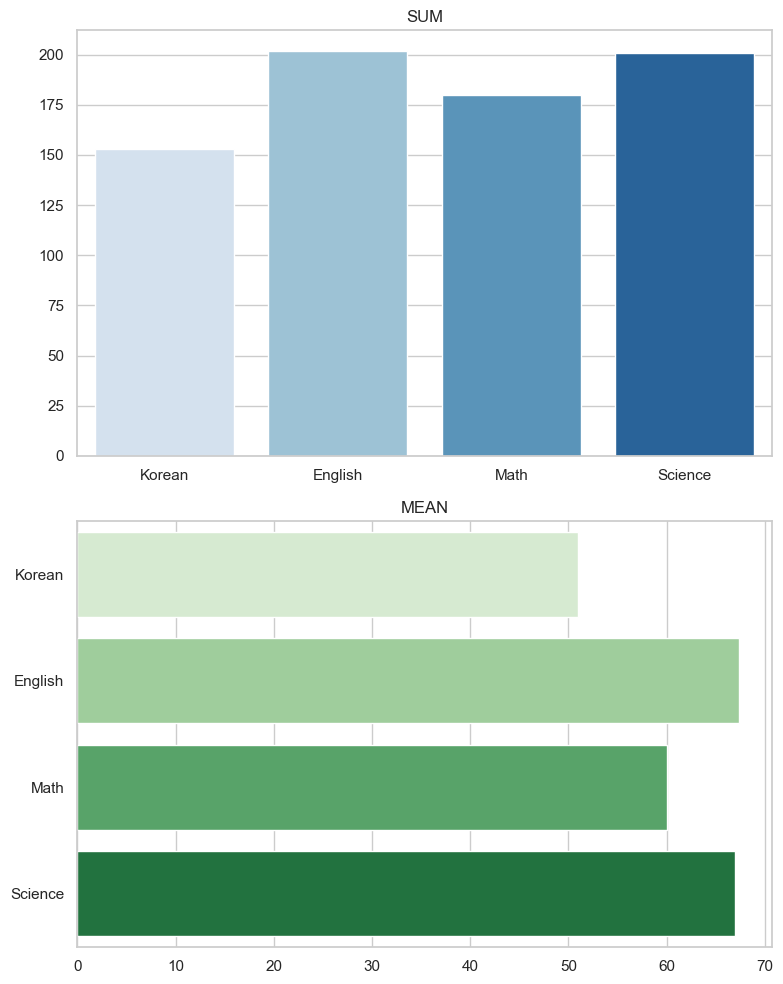

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sums = df.loc['SUM'][:4]
means = df.loc['MEAN'][:4]

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.barplot(x=sums.index, y=sums.values, ax=axes[0], palette="Blues")
axes[0].set_title('SUM')

sns.barplot(x=means.values, y=means.index, ax=axes[1], palette="Greens")
axes[1].set_title('MEAN')

plt.tight_layout()
plt.show()

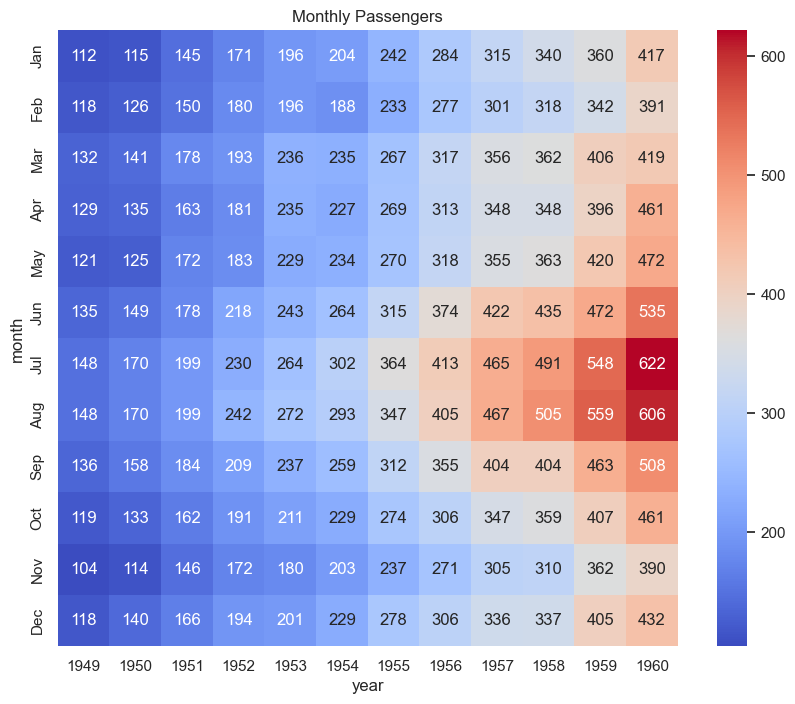

In [31]:
# 시본의 샘플 데이터셋 불러오기
flights = sns.load_dataset("flights")

# 플롯 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(flights.pivot_table(index='month', columns='year', values='passengers'), cmap='coolwarm', annot=True, fmt="d")
plt.title('Monthly Passengers')
plt.show()

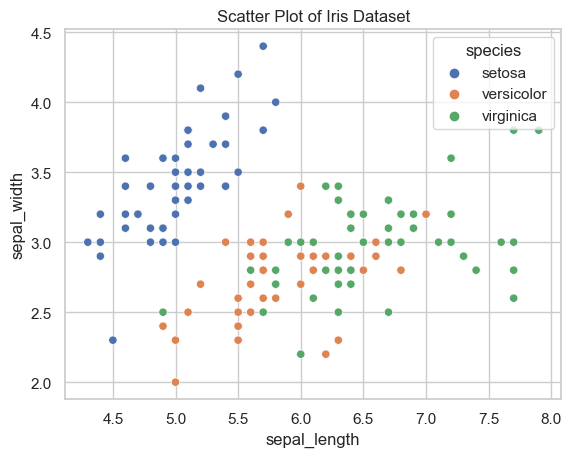

In [33]:
# Seaborn의 샘플 데이터셋 불러오기
iris = sns.load_dataset("iris")

# 산점도 그리기
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=iris)
plt.title("Scatter Plot of Iris Dataset")
plt.show()

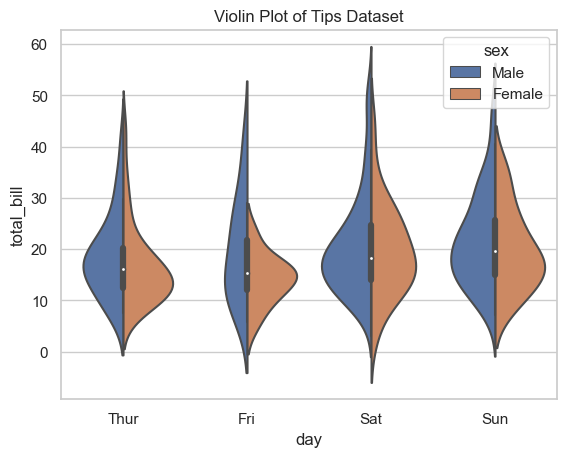

In [35]:
# Seaborn의 샘플 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 바이올린 플롯 그리기
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.title("Violin Plot of Tips Dataset")
plt.show()

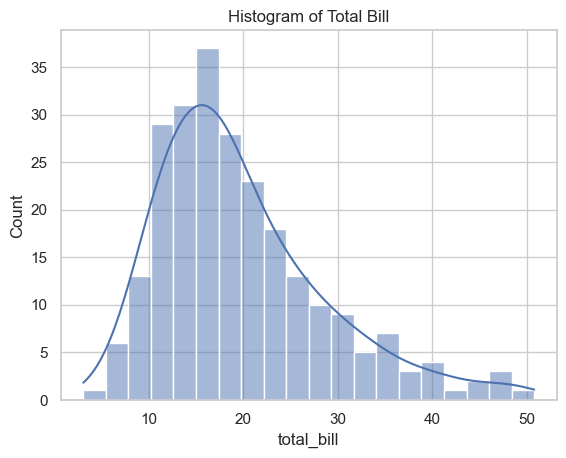

In [36]:
# Seaborn의 샘플 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 히스토그램 그리기
sns.histplot(data=tips, x="total_bill", bins=20, kde=True)
plt.title("Histogram of Total Bill")
plt.show()

C:\Users\602-24\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


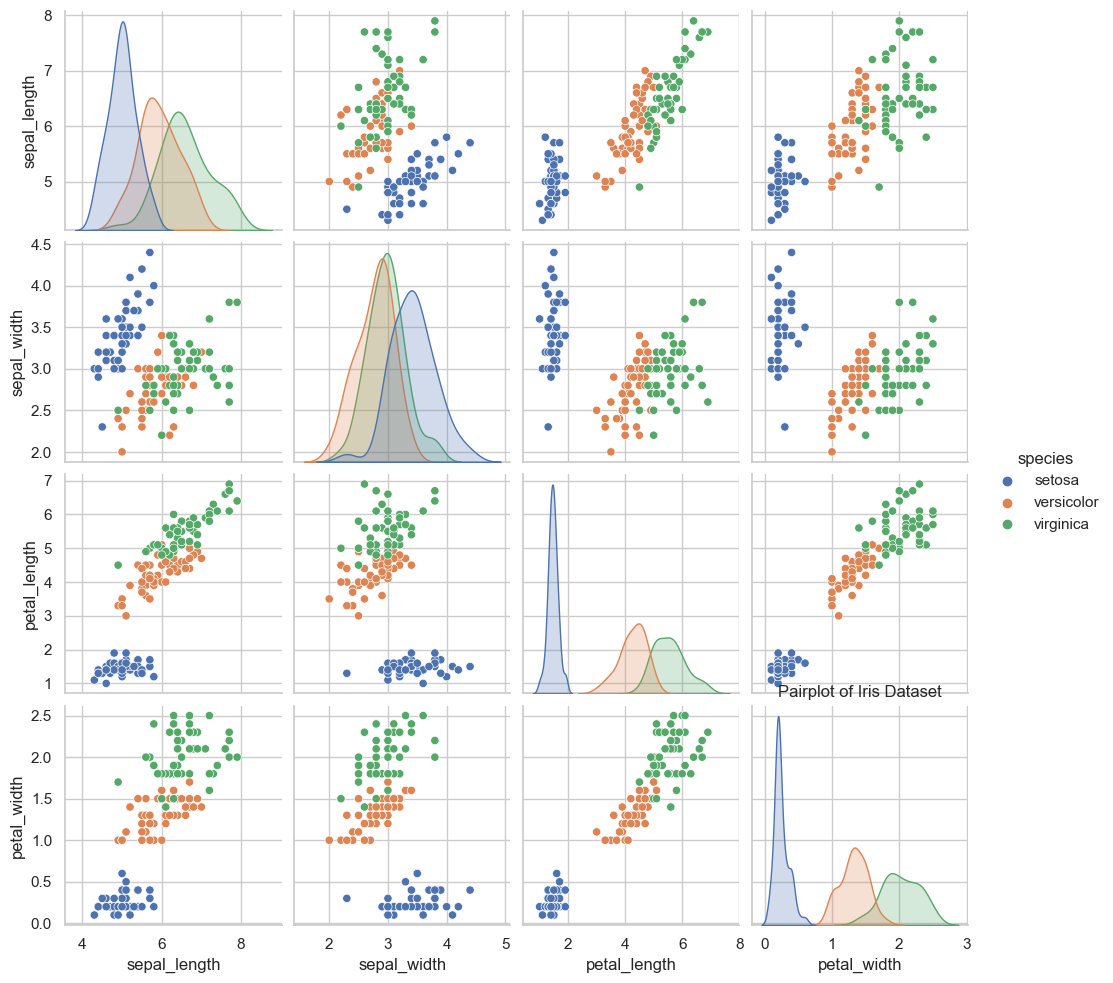

In [37]:
# Seaborn의 샘플 데이터셋 불러오기
iris = sns.load_dataset("iris")

# 관계 그래프 그리기
sns.pairplot(iris, hue="species")
plt.title("Pairplot of Iris Dataset")
plt.show()

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Titanic 데이터셋 불러오기
titanic_data = pd.read_csv('titanic.csv')

# 데이터 확인
print(titanic_data.head())

# 필요한 특성 및 레이블 선택
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

# 범주형 데이터를 숫자로 변환 (인코딩)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# 결측치 처리
X['Age'].fillna(X['Age'].median(), inplace=True)

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy}')

# 혼동 행렬 출력
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred))

# 분류 보고서 출력
print("분류 보고서:\n", classification_report(y_test, y_pred))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
정확

## 결측치 처리

In [46]:
# 예제 데이터프레임 생성
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Edward'],
        'Age': [25, 30, None, 22, 35],
        'Salary': [50000, 60000, 75000, None, 80000]}

df = pd.DataFrame(data)

# 결측치 확인
print("Original DataFrame:")
print(df)
print("\nMissing Values:")
print(df.isnull().sum())



Original DataFrame:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  30.0  60000.0
2  Charlie   NaN  75000.0
3    David  22.0      NaN
4   Edward  35.0  80000.0

Missing Values:
Name      0
Age       1
Salary    1
dtype: int64


In [47]:
df_dropna = df.dropna()
df_dropna

,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,30.0,60000.0
4,Edward,35.0,80000.0


In [49]:
# 결측치 대체
# 여기에서는 각 열의 평균값으로 결측치를 대체합니다.
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# 대체 후 데이터프레임 출력
print("\nDataFrame after replacing missing values:")
print(df)


DataFrame after replacing missing values:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  30.0  60000.0
2  Charlie  28.0  75000.0
3    David  22.0  66250.0
4   Edward  35.0  80000.0


In [52]:
# 결측치 대체
# 여기에서는 각 열의 특정값으로 결측치를 대체합니다.
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Edward'],
        'Age': [25, 30, None, 22, 35],
        'Salary': [50000, 60000, 75000, None, 80000]}

df = pd.DataFrame(data)

df_fillna_zero = df.fillna(0)

# 대체 후 데이터프레임 출력
print("\nDataFrame after replacing missing values:")
print(df_fillna_zero)


DataFrame after replacing missing values:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  30.0  60000.0
2  Charlie   0.0  75000.0
3    David  22.0      0.0
4   Edward  35.0  80000.0


## 중복데이터

In [56]:
# 샘플 데이터프레임 생성
data = {
    'A': [1, 2, 2, 4, 1],
    'B': [5, 5, 3, 2, 5],
    'C': [10, 20, 30, 30, 10]
}
df = pd.DataFrame(data)

df

,A,B,C
0,1,5,10
1,2,5,20
2,2,3,30
3,4,2,30
4,1,5,10


In [80]:
# 중복된 행 확인
duplicate_rows = df[df.duplicated()]
print("중복된 행 확인:")
duplicate_rows

중복된 행 확인:


,A,B,C
4,1,5,10


In [82]:
# 중복값 제거
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,A,B,C
0,1,5,10
1,2,5,20
2,2,3,30
3,4,2,30


In [69]:
# A열 중복값 제거
df_no_duplicates_A = df.drop_duplicates(subset=['A'])
df_no_duplicates_A

,A,B,C
0,1,5,10
1,2,5,20
3,4,2,30


## 이상치 제거

In [77]:
import numpy as np

data = np.array([1,40,50,60,100])

# IQR 계산
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3-Q1

# 이상치 식별 : IQR을 사용하여 이상치 결정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 제외한 데이터 추출
cleaned_data = data[(data >= lower_bound) & (data <=upper_bound)]

print("이상치를 제거한 데이터:", cleaned_data)

이상치를 제거한 데이터: [40 50 60]


In [78]:
import numpy as np

# 예제 데이터 생성 (정상 데이터와 이상치 포함)
np.random.seed(42)
normal_data = np.random.normal(0, 1, 1000)
anomaly_data = np.random.normal(7, 1, 50)
data = np.concatenate([normal_data, anomaly_data])

# 이상치 탐지 함수 (Z-Score 사용)
def remove_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.abs(z_scores) > threshold
    cleaned_data = data[~outliers]
    return cleaned_data, outliers

# 이상치 탐지 및 제거
cleaned_data, outliers = remove_outliers_zscore(data, threshold=3)

# 결과 출력
print("원래 데이터 포인트 개수:", len(data))
print("이상치 개수:", np.sum(outliers))
print("이상치 제거 후 데이터 포인트 개수:", len(cleaned_data))

원래 데이터 포인트 개수: 1050
이상치 개수: 46
이상치 제거 후 데이터 포인트 개수: 1004


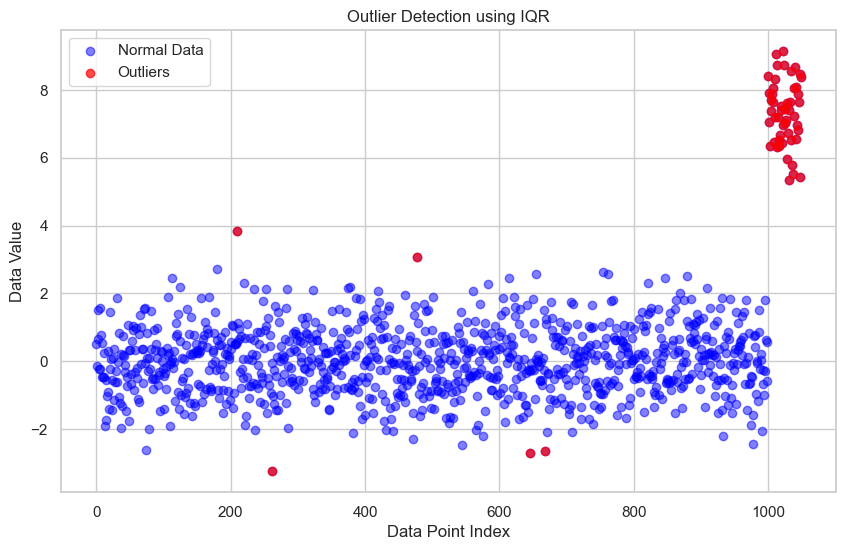

원래 데이터 포인트 개수: 1050
이상치 개수: 55
이상치 제거 후 데이터 포인트 개수: 995


In [79]:
import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터 생성 (정상 데이터와 이상치 포함)
np.random.seed(42)
normal_data = np.random.normal(0, 1, 1000)
anomaly_data = np.random.normal(7, 1, 50)
data = np.concatenate([normal_data, anomaly_data])
def detect_outliers_iqr(data, threshold=1.5):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# 이상치 탐지
outliers = detect_outliers_iqr(data)

# 이상치 시각화
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, c='blue', label='Normal Data', alpha=0.5)
plt.scatter(np.where(outliers)[0], data[outliers], c='red', label='Outliers', alpha=0.7)
plt.title('Outlier Detection using IQR')
plt.xlabel('Data Point Index')
plt.ylabel('Data Value')
plt.legend()
plt.show()

# 이상치 제거
cleaned_data = data[~outliers]

# 결과 출력
print("원래 데이터 포인트 개수:", len(data))
print("이상치 개수:", np.sum(outliers))
print("이상치 제거 후 데이터 포인트 개수:", len(cleaned_data))